In [27]:
!pip install prophet

   ---------------------------------------- 0.0/13.3 MB ? eta -:--:--
    --------------------------------------- 0.3/13.3 MB ? eta -:--:--
   -- ------------------------------------- 0.8/13.3 MB 2.8 MB/s eta 0:00:05
   --- ------------------------------------ 1.0/13.3 MB 1.9 MB/s eta 0:00:07
   ----- ---------------------------------- 1.8/13.3 MB 2.3 MB/s eta 0:00:06
   ------- -------------------------------- 2.4/13.3 MB 2.4 MB/s eta 0:00:05
   -------- ------------------------------- 2.9/13.3 MB 2.5 MB/s eta 0:00:05
   ---------- ----------------------------- 3.4/13.3 MB 2.5 MB/s eta 0:00:04
   ------------ --------------------------- 4.2/13.3 MB 2.6 MB/s eta 0:00:04
   -------------- ------------------------- 4.7/13.3 MB 2.6 MB/s eta 0:00:04
   ----------------- ---------------------- 5.8/13.3 MB 2.9 MB/s eta 0:00:03
   -------------------- ------------------- 6.8/13.3 MB 3.1 MB/s eta 0:00:03
   ------------------------ --------------- 8.1/13.3 MB 3.4 MB/s eta 0:00:02
   ----------

In [29]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

In [31]:
df = pd.read_csv('co2_absorption.csv')

In [33]:
df.head()

,result,table,_start,_stop,_time,_measurement,absorption_rate,co2_concentration,pressure,temperature
0,_result,0,2025-06-28 23:41:39.399094+00:00,2025-06-29 23:41:39.399094+00:00,2025-06-29 20:51:15.452122+00:00,co2_absorption,0.865248,8.267876,2.202165,47.824830
1,_result,0,2025-06-28 23:41:39.399094+00:00,2025-06-29 23:41:39.399094+00:00,2025-06-29 20:51:20.887610+00:00,co2_absorption,0.830061,6.823304,2.719182,50.842575
2,_result,0,2025-06-28 23:41:39.399094+00:00,2025-06-29 23:41:39.399094+00:00,2025-06-29 20:51:26.315982+00:00,co2_absorption,0.814275,9.758797,2.144701,58.131011
3,_result,0,2025-06-28 23:41:39.399094+00:00,2025-06-29 23:41:39.399094+00:00,2025-06-29 20:51:31.748003+00:00,co2_absorption,0.770869,7.225879,2.627136,57.980534
4,_result,0,2025-06-28 23:41:39.399094+00:00,2025-06-29 23:41:39.399094+00:00,2025-06-29 20:51:37.182576+00:00,co2_absorption,0.926084,9.547670,1.974465,54.209848


In [37]:
df.isnull().sum()

result               0
table                0
_start               0
_stop                0
_time                0
_measurement         0
absorption_rate      0
co2_concentration    0
pressure             0
temperature          0
dtype: int64

In [66]:
# Prepare for Prophet: must have columns `ds` and `y`
df = df.rename(columns={"_time": "ds", "co2_concentration": "y"})
df['ds'] = pd.to_datetime(df['ds']).dt.tz_localize(None)
df = df[['ds', 'y']].dropna()

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1664 entries, 0 to 1663
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      1664 non-null   datetime64[ns]
 1   y       1664 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 26.1 KB


In [70]:
df.head()

,ds,y
0,2025-06-29 20:51:15.452122,8.267876
1,2025-06-29 20:51:20.887610,6.823304
2,2025-06-29 20:51:26.315982,9.758797
3,2025-06-29 20:51:31.748003,7.225879
4,2025-06-29 20:51:37.182576,9.547670


In [72]:
# Initialize and train model
model = Prophet()
model.fit(df)

02:26:26 - cmdstanpy - INFO - Chain [1] start processing
02:26:27 - cmdstanpy - INFO - Chain [1] done processing


In [74]:
# Forecast 1 hour ahead in 5-minute steps
future = model.make_future_dataframe(periods=12, freq='5min')
forecast = model.predict(future)

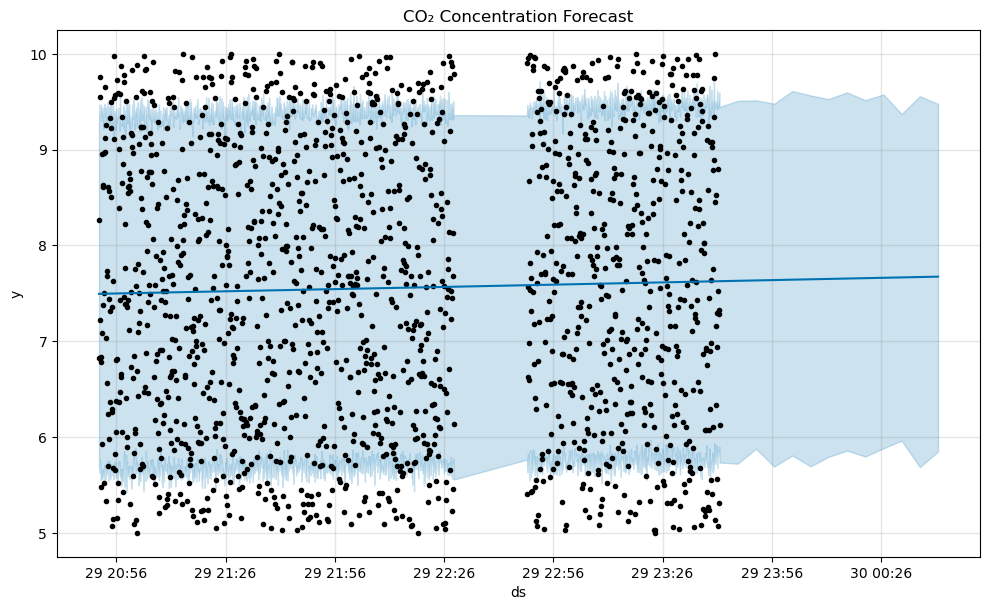

In [76]:
# Plot
fig = model.plot(forecast)
plt.title("CO₂ Concentration Forecast")
plt.show()